In [1]:
import numpy as np
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.formula.api as smf
import urllib2
plt.style.use('ggplot')


In [2]:
data = pd.read_csv('countytable.csv', index_col=0 )

In [3]:
data.head()

,trump,clinton,processed,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,...,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,trumpp
fips,,,,,,,,,,,,,,,,,,,,,
1001,18110,5908,100,Autauga County,AL,55395,54571,1.5,54571,6.0,...,31.7,0,0,598175,12003,88157,131,594.44,91.8,0.754018
1003,72780,18409,100,Baldwin County,AL,200111,182265,9.8,182265,5.6,...,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6,0.798123
1005,5431,4848,100,Barbour County,AL,26887,27457,-2.1,27457,5.7,...,27.0,0,0,188337,6334,0,8,884.88,31.0,0.528359
1007,6733,1874,100,Bibb County,AL,22506,22919,-1.8,22915,5.3,...,0.0,0,0,124707,5804,10757,19,622.58,36.8,0.782270
1009,22808,2150,100,Blount County,AL,57719,57322,0.7,57322,6.1,...,23.2,341544,0,319700,5622,20941,3,644.78,88.9,0.913855


In [4]:
data.AGE775214

fips
1001     13.8
1003     18.7
1005     16.5
1007     14.8
1009     17.0
1011     14.9
1013     18.0
1015     16.0
1017     18.3
1019     20.9
1021     15.2
1023     20.8
1025     18.0
1027     19.4
1029     18.4
1031     15.9
1033     18.5
1035     20.4
1037     18.5
1039     19.8
1041     18.0
1043     17.6
1045     15.4
1047     15.6
1049     15.7
1051     14.0
1053     16.7
1055     17.3
1057     19.6
1059     15.9
         ... 
54051    19.6
54053    18.8
54055    19.3
54057    19.9
54059    15.5
54061    10.8
54063    22.4
54065    20.9
54067    19.2
54069    19.5
54071    24.6
54073    18.3
54075    22.4
54077    17.4
54079    16.6
54081    18.2
54083    20.0
54085    20.1
54087    19.3
54089    21.1
54091    17.8
54093    22.7
54095    20.2
54097    18.2
54099    18.4
54101    21.5
54103    21.4
54105    18.4
54107    18.6
54109    17.5
Name: AGE775214, dtype: float64

In [5]:
data.rename(columns={'PST045214': 'Population'}, inplace=True)

In [6]:
data.rename(columns={'AGE295214': 'Population18'}, inplace=True)

In [7]:
data.rename(columns={'AGE775214': 'Population65'}, inplace=True)

In [8]:
data.rename(columns={'Population65': 'Senior'}, inplace=True)

In [9]:
data.rename(columns={'SEX255214': 'Female'}, inplace=True)

In [10]:
data.rename(columns={'RHI125214': 'White'}, inplace=True)

In [11]:
data.rename(columns={'RHI225214': 'Black'}, inplace=True)

In [12]:
data.rename(columns={'RHI425214': 'Asian'}, inplace=True)

In [13]:
data.rename(columns={'POP645213': 'Foreign'}, inplace=True)

In [14]:
data.rename(columns={'EDU685213': 'Bachelor'}, inplace=True)

In [15]:
data.rename(columns={'RHI725214': 'Latino'}, inplace=True)

In [16]:
data.rename(columns={'RHI625214': 'Mixed'}, inplace=True)

In [17]:
data.rename(columns={'RHI825214': 'WhiteNH'}, inplace=True)

In [18]:
data.rename(columns={'POP060210': 'Density'}, inplace=True)

In [19]:
data.rename(columns={'HSG445213': 'HomeOwners'}, inplace=True)

In [20]:
data.rename(columns={'INC910213': 'Income'}, inplace=True)

In [21]:
data.columns

Index([u'trump', u'clinton', u'processed', u'area_name', u'state_abbreviation',
       u'Population', u'PST040210', u'PST120214', u'POP010210', u'AGE135214',
       u'Population18', u'Senior', u'Female', u'White', u'Black', u'RHI325214',
       u'Asian', u'RHI525214', u'Mixed', u'Latino', u'WhiteNH', u'POP715213',
       u'Foreign', u'POP815213', u'EDU635213', u'Bachelor', u'VET605213',
       u'LFE305213', u'HSG010214', u'HomeOwners', u'HSG096213', u'HSG495213',
       u'HSD410213', u'HSD310213', u'Income', u'INC110213', u'PVY020213',
       u'BZA010213', u'BZA110213', u'BZA115213', u'NES010213', u'SBO001207',
       u'SBO315207', u'SBO115207', u'SBO215207', u'SBO515207', u'SBO415207',
       u'SBO015207', u'MAN450207', u'WTN220207', u'RTN130207', u'RTN131207',
       u'AFN120207', u'BPS030214', u'LND110210', u'Density', u'trumpp'],
      dtype='object')

In [22]:
# data['Bachelor']

In [23]:
data.state_abbreviation.unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
       'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MO', 'MT', 'NE', 'NJ',
       'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'WA', 'WV'], dtype=object)

In [24]:
#  NH CT RI MA VT C

In [25]:
data['TElectorate']=data.Population*(1-data.Population18/100)
data['TFemale']=data.TElectorate*data.Female/100
data['TSeniors']=data.TElectorate*data.Senior/100
data['TWhite']=data.TElectorate*data.WhiteNH/100
data['TBlack']=data.TElectorate*data.Black/100
data['TLatino']=data.TElectorate*data.Latino/100
data['TAsian']=data.TElectorate*data.Asian/100
data['TIncome']=data.Population*data.Income/100
data['TBachelor']=data.Population*data.Bachelor/100
data['TArea']=data.LND110210
data['TRacialDiversity'] = data.TElectorate*(1-data.WhiteNH/100)
#Racial Diversity is defined as the percentage of nonwhite voters
data['TForeign'] = data.TElectorate*data.Foreign/100

In [26]:
data['SElectorate']=data['TElectorate']**0.5
data['SFemale']=data.SElectorate*data.Female/100
data['SSeniors']=data.SElectorate*data.Senior/100
data['SWhite']=data.SElectorate*data.WhiteNH/100
data['SBlack']=data.SElectorate*data.Black/100
data['SLatino']=data.SElectorate*data.Latino/100
data['SAsian']=data.SElectorate*data.Asian/100
data['SIncome']=data['TIncome']/data.SElectorate
data['SBachelor']=data['TBachelor']/data.SElectorate
data['SRacialDiversity'] = data.SElectorate*(1-data.WhiteNH/100)
#Squaring Racial Diversity Varaible 
data['SForeign'] = data.SElectorate*data.Foreign/100

In [27]:
data['TDensity']=np.log(data.Density)*data.TElectorate
data['TSize']=np.log(data.Population)*data.TElectorate

In [28]:
data['SDensity']=np.log(data.Density)*data.SElectorate
data['SSize']=np.log(data.Population)*data.SElectorate

In [29]:
data['Strump']=data.trump/data.SElectorate
data['Sclinton']=data.clinton/data.SElectorate

In [30]:
data.head()

,trump,clinton,processed,area_name,state_abbreviation,Population,PST040210,PST120214,POP010210,AGE135214,...,SIncome,SBachelor,SRacialDiversity,SForeign,TDensity,TSize,SDensity,SSize,Strump,Sclinton
fips,,,,,,,,,,,,,,,,,,,,,
1001,18110,5908,100,Autauga County,AL,55395,54571,1.5,54571,6.0,...,66866.303674,56.876226,49.667913,3.256912,187272.214574,4.525682e+05,919.998807,2223.299555,88.967701,29.023809
1003,72780,18409,100,Baldwin County,AL,200111,182265,9.8,182265,5.6,...,135746.661102,140.483543,67.077088,14.204560,738178.740296,1.900405e+06,1870.838306,4816.382515,184.453445,46.655722
1005,5431,4848,100,Barbour County,AL,26887,27457,-2.1,27457,5.7,...,31086.109701,24.752146,77.727650,4.221165,72755.735806,2.160942e+05,499.842241,1484.597856,37.311742,33.306449
1007,6733,1874,100,Bibb County,AL,22506,22919,-1.8,22915,5.3,...,29414.281394,20.423068,34.001876,1.600088,64104.814258,1.781803e+05,480.759576,1336.278702,50.494713,14.054224
1009,22808,2150,100,Blount County,AL,57719,57322,0.7,57322,6.1,...,56978.632505,33.258150,25.619220,9.029725,197887.241003,4.834539e+05,942.348872,2302.231692,108.612829,10.238407


In [31]:
data.columns

Index([u'trump', u'clinton', u'processed', u'area_name', u'state_abbreviation',
       u'Population', u'PST040210', u'PST120214', u'POP010210', u'AGE135214',
       u'Population18', u'Senior', u'Female', u'White', u'Black', u'RHI325214',
       u'Asian', u'RHI525214', u'Mixed', u'Latino', u'WhiteNH', u'POP715213',
       u'Foreign', u'POP815213', u'EDU635213', u'Bachelor', u'VET605213',
       u'LFE305213', u'HSG010214', u'HomeOwners', u'HSG096213', u'HSG495213',
       u'HSD410213', u'HSD310213', u'Income', u'INC110213', u'PVY020213',
       u'BZA010213', u'BZA110213', u'BZA115213', u'NES010213', u'SBO001207',
       u'SBO315207', u'SBO115207', u'SBO215207', u'SBO515207', u'SBO415207',
       u'SBO015207', u'MAN450207', u'WTN220207', u'RTN130207', u'RTN131207',
       u'AFN120207', u'BPS030214', u'LND110210', u'Density', u'trumpp',
       u'TElectorate', u'TFemale', u'TSeniors', u'TWhite', u'TBlack',
       u'TLatino', u'TAsian', u'TIncome', u'TBachelor', u'TArea',
       u'TRacialDiv

In [32]:
lm0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()

In [33]:
lm0.rsquared

0.8902122532409068

In [34]:
def singleFactorAnalysis(factor):
    lmT0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()
    lmC0 = smf.ols(formula='Sclinton ~ SElectorate -1', data = data).fit()
    lmT = smf.ols(formula='Strump ~ SElectorate + ' + factor +' -1', data = data).fit()
    lmC = smf.ols(formula='Sclinton ~ SElectorate + ' + factor +' -1', data = data).fit()
    R2T=1-(1-lmT.rsquared)/(1-lmT0.rsquared)
    R2C=1-(1-lmC.rsquared)/(1-lmC0.rsquared)
    return [R2T, R2C]

In [35]:
singleFactorAnalysis('SWhite')

[0.22931754177733599, 0.034002251671160888]

In [36]:
singleFactorAnalysis('SBlack')

[0.011336077696619817, 0.078504171653229871]

In [37]:
singleFactorAnalysis('SLatino')

[0.21472458532444216, 0.081301351016036305]

In [38]:
singleFactorAnalysis('SSize')

[0.13552314515697672, 0.0076372366252546176]

In [39]:
singleFactorAnalysis('SFemale')

[0.0014275605127226365, 0.052320513253841905]

In [40]:
singleFactorAnalysis('SSeniors')

[0.091021663849851331, 0.0072777884350281319]

In [41]:
singleFactorAnalysis('SIncome')

[0.011019157485152253, 0.0033128042567523996]

In [42]:
singleFactorAnalysis('SBachelor')

[0.00044924324338657673, 0.016497196366543787]

In [43]:
singleFactorAnalysis('SDensity')

[0.023504482051504572, 0.00014452966271072398]

In [44]:
singleFactorAnalysis('SRacialDiversity')

[0.22931754177733599, 0.034002251671160888]

In [45]:
singleFactorAnalysis('SForeign')

[0.11202994363499064, 0.089443540280229494]

In [46]:
# lmT0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()
# lmT = smf.ols(formula='Strump ~ SElectorate + SFemale + SWhite + SBlack + SLatino + SIncome + data.SBachelor + data.SSeniors + data.SDensity + data.SSize-1', data = data).fit()
# R2T=1-(1-lmT.rsquared)/(1-lm0.rsquared)
# lmC0 = smf.ols(formula='Sclinton ~ SElectorate -1', data = data).fit()
# lmC = smf.ols(formula='Sclinton ~ SElectorate + SFemale + SWhite + SBlack + SLatino + SIncome + data.SBachelor + data.SSeniors + data.SDensity + data.SSize-1', data = data).fit()
# R2C=1-(1-lmC.rsquared)/(1-lmC0.rsquared)
# print [R2T, R2C]

In [47]:
lmT0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()
lmT1 = smf.ols(formula='Strump ~ SElectorate + SIncome + SBachelor + SDensity + SRacialDiversity + SForeign', data=data).fit()
R2T=1-(1-lmT1.rsquared)/(1-lm0.rsquared)
lmC0 = smf.ols(formula='Sclinton ~ SElectorate -1', data = data).fit()
lmC = smf.ols(formula='Sclinton ~ SElectorate + SIncome + SBachelor + SDensity + SRacialDiversity + SForeign', data = data).fit()
R2C=1-(1-lmC.rsquared)/(1-lmC0.rsquared)
print [R2T, R2C]

[-0.54621717362776279, -0.35751901837303546]


In [48]:
lmT0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()
lmT1 = smf.ols(formula='Strump ~ SElectorate + SIncome + SBachelor + SDensity + SRacialDiversity + SForeign', data=data).fit()
R2T=1-(1-lmT1.rsquared)/(1-lmT0.rsquared)
lmC0 = smf.ols(formula='Sclinton ~ SElectorate -1', data = data).fit()
lmC = smf.ols(formula='Sclinton ~ SElectorate + SIncome + SBachelor + SDensity + SRacialDiversity + SForeign', data = data).fit()
R2C=1-(1-lmC.rsquared)/(1-lmC0.rsquared)
print [R2T, R2C]

[-0.54621717362776279, -0.35751901837303546]


In [49]:
def addFactorAnalysis(previos,factor):
    lmP = smf.ols(formula='Strump ~ ' + previos +' -1', data = data).fit()
    lmX = smf.ols(formula=factor+' ~ ' + previos +' -1', data = data).fit()
    XP = lmX.predict()
    dataX=data
    dataX['X']=data[factor]-XP
    lm = smf.ols(formula='Strump ~ ' + previos +' + X -1', data = dataX).fit()
    pvalue=lm.pvalues[-1]
    est=[lm.conf_int()[0].X, lm.conf_int()[1].X]
    XR2=1-(1-lm.rsquared)/(1-lmP.rsquared)
    print 'R2 = %.4f, p-value=%e, estimate=[%e %e]'%(XR2,pvalue,est[0],est[1])
    return [est,pvalue,XR2]

In [50]:
addFactorAnalysis('SElectorate','SIncome');

R2 = 0.0110, p-value=6.446414e-08, estimate=[7.730090e-05 1.649018e-04]


In [51]:
addFactorAnalysis('SElectorate + SIncome','SBachelor');

R2 = 0.0498, p-value=3.634641e-31, estimate=[-3.793786e-01 -2.709585e-01]


In [52]:
addFactorAnalysis('SElectorate + SIncome + SBachelor + SDensity', 'SRacialDiversity')

R2 = 0.1974, p-value=5.096338e-128, estimate=[-2.419319e-01 -2.073295e-01]


[[-0.24193188253489895, -0.20732947029457238],
 5.0963375218419439e-128,
 0.19741897292237676]

In [53]:
addFactorAnalysis('SElectorate + SIncome + SBachelor ', 'SRacialDiversity')

R2 = 0.2175, p-value=1.385165e-142, estimate=[-2.200074e-01 -1.902844e-01]


[[-0.22000740636492522, -0.190284416700429],
 1.3851653657709554e-142,
 0.21749040664879737]

In [54]:
addFactorAnalysis('SElectorate + SIncome + SBachelor + SRacialDiversity ','SForeign')

R2 = 0.0000, p-value=9.796680e-01, estimate=[-5.105907e-02 4.974876e-02]


[[-0.051059070071195721, 0.049748756648825838],
 0.97966798680187284,
 2.4653375996219751e-07]

In [55]:
lm_ = smf.ols(formula='SElectorate ~ SIncome + SBachelor + SRacialDiversity + SForeign + SDensity', data = data).fit()
print lm_.summary()

                            OLS Regression Results                            
Dep. Variable:            SElectorate   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.871e+04
Date:                Tue, 13 Dec 2016   Prob (F-statistic):               0.00
Time:                        08:34:20   Log-Likelihood:                -12862.
No. Observations:                2640   AIC:                         2.574e+04
Df Residuals:                    2634   BIC:                         2.577e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           50.5030      1.002  

In [56]:
for s in [u'SIncome',
       u'SBachelor', u'SRacialDiversity', u'SForeign', u'SDensity']:
    data[s + '_norm'] = data[s] / data[s].mean()

In [57]:
data.head()

,trump,clinton,processed,area_name,state_abbreviation,Population,PST040210,PST120214,POP010210,AGE135214,...,SDensity,SSize,Strump,Sclinton,X,SIncome_norm,SBachelor_norm,SRacialDiversity_norm,SForeign_norm,SDensity_norm
fips,,,,,,,,,,,,,,,,,,,,,
1001,18110,5908,100,Autauga County,AL,55395,54571,1.5,54571,6.0,...,919.998807,2223.299555,88.967701,29.023809,-10.064153,1.042057,0.949301,0.882566,0.220220,0.948865
1003,72780,18409,100,Baldwin County,AL,200111,182265,9.8,182265,5.6,...,1870.838306,4816.382515,184.453445,46.655722,-2.238515,2.115500,2.344761,1.191916,0.960459,1.929538
1005,5431,4848,100,Barbour County,AL,26887,27457,-2.1,27457,5.7,...,499.842241,1484.597856,37.311742,33.306449,-15.586054,0.484452,0.413129,1.381169,0.285419,0.515525
1007,6733,1874,100,Bibb County,AL,22506,22919,-1.8,22915,5.3,...,480.759576,1336.278702,50.494713,14.054224,-2.440897,0.458397,0.340874,0.604191,0.108192,0.495844
1009,22808,2150,100,Blount County,AL,57719,57322,0.7,57322,6.1,...,942.348872,2302.231692,108.612829,10.238407,9.521413,0.887965,0.555100,0.455237,0.610556,0.971916


In [58]:
lm_ = smf.ols(formula='trumpp ~ SBachelor_norm + SIncome_norm + SRacialDiversity_norm ' +
              '+ SForeign_norm + SDensity_norm', data = data).fit()
print lm_.summary()

                            OLS Regression Results                            
Dep. Variable:                 trumpp   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     42.58
Date:                Tue, 13 Dec 2016   Prob (F-statistic):           2.62e-42
Time:                        08:34:20   Log-Likelihood:                 710.20
No. Observations:                2640   AIC:                            -1408.
Df Residuals:                    2634   BIC:                            -1373.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.68

*** step 3

In [59]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SIncome'); #!!!!

R2 = 0.0201, p-value=2.632620e-13, estimate=[1.053654e-04 1.820423e-04]


In [60]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SBachelor');

R2 = 0.0016, p-value=3.729325e-02, estimate=[1.581952e-03 5.213206e-02]


In [61]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SBlack');

R2 = 0.0003, p-value=4.024792e-01, estimate=[-6.174282e-02 2.479084e-02]


In [62]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SFemale');

R2 = 0.0049, p-value=3.261596e-04, estimate=[2.237080e-01 7.594876e-01]


In [63]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SDensity');

R2 = 0.0070, p-value=1.781980e-05, estimate=[2.843296e-03 7.613341e-03]


In [64]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SSize');

R2 = 0.0063, p-value=4.646210e-05, estimate=[-7.845629e-03 -2.751867e-03]


***step 4 *****

In [65]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome','SBachelor'); #!!!!

R2 = 0.0266, p-value=3.385761e-17, estimate=[-2.603984e-01 -1.626870e-01]


In [66]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome ', 'SSize');

R2 = 0.0282, p-value=3.817421e-18, estimate=[-1.546747e-02 -9.802783e-03]


In [67]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome + SSize', 'SBachelor');

R2 = 0.0148, p-value=3.695754e-10, estimate=[-2.129300e-01 -1.117267e-01]


In [68]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome + SSize', 'SSeniors');

R2 = 0.0203, p-value=1.916950e-13, estimate=[2.498316e-01 4.301947e-01]


In [69]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome + SSize', 'SFemale');

R2 = 0.0114, p-value=4.017374e-08, estimate=[4.884500e-01 1.028733e+00]


In [70]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome + SFemale + SBachelor + SSeniors', 'SSize');

R2 = 0.0216, p-value=3.523742e-14, estimate=[-1.462950e-02 -8.641034e-03]


In [71]:
def addFactorAnalysisC(previos,factor):
    lmP = smf.ols(formula='Sclinton ~ ' + previos +' -1', data = data).fit()
    lmX = smf.ols(formula=factor+' ~ ' + previos +' -1', data = data).fit()
    XP = lmX.predict()
    dataX=data
    dataX['X']=data[factor]-XP
    lm = smf.ols(formula='Sclinton ~ ' + previos +' + X -1', data = dataX).fit()
    pvalue=lm.pvalues[-1]
    est=[lm.conf_int()[0].X, lm.conf_int()[1].X]
    XR2=1-(1-lm.rsquared)/(1-lmP.rsquared)
    print 'R2 = %.4f, p-value=%e, estimate=[%e %e]'%(XR2,pvalue,est[0],est[1])
    return [est,pvalue,XR2]

In [72]:
addFactorAnalysisC('SElectorate ', 'SSize');

R2 = 0.0076, p-value=6.900844e-06, estimate=[-7.662697e-03 -3.015620e-03]


In [73]:
addFactorAnalysisC('SElectorate + SWhite + SLatino + SIncome + SFemale + SBachelor + SSeniors', 'SSize');

R2 = 0.0029, p-value=5.803521e-03, estimate=[-8.290389e-03 -1.404742e-03]


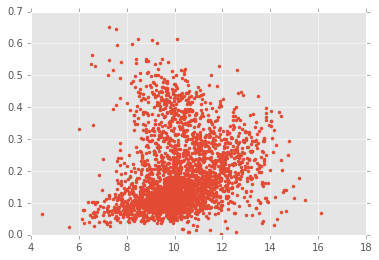

In [74]:
plt.plot(data.SSize/data.SElectorate,data.Sclinton/data.SElectorate,'.')

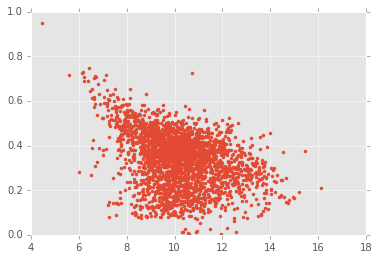

In [75]:
plt.plot(data.SSize/data.SElectorate,data.Strump/data.SElectorate,'.')

In [76]:
lmTrump = smf.ols(formula='Strump ~ SElectorate + SWhite + SLatino + SIncome + SFemale + SBachelor + SSeniors', data = data).fit()
resTrump = data.Strump - lmTrump.predict()

In [77]:
lmClinton = smf.ols(formula='Sclinton ~ SElectorate + SWhite + SLatino + SIncome + SFemale + SBachelor + SSeniors', data = data).fit()
resClinton = data.Sclinton - lmClinton.predict()

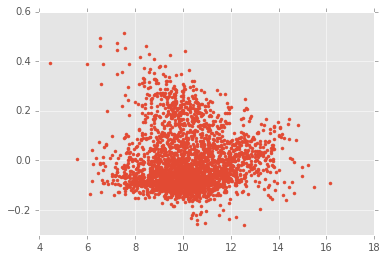

In [78]:
plt.plot(data.SSize/data.SElectorate,resClinton/data.SElectorate,'.')

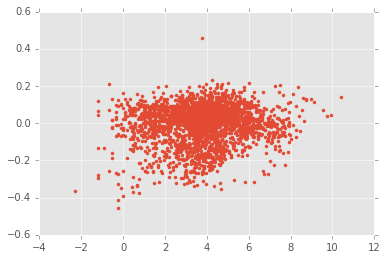

In [79]:
plt.plot(data.SDensity/data.SElectorate,resTrump/data.SElectorate,'.')

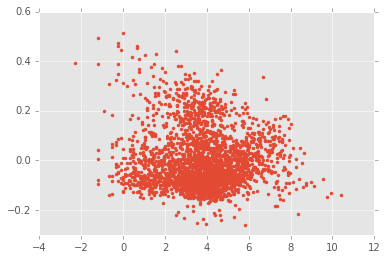

In [80]:
plt.plot(data.SDensity/data.SElectorate,resClinton/data.SElectorate,'.')

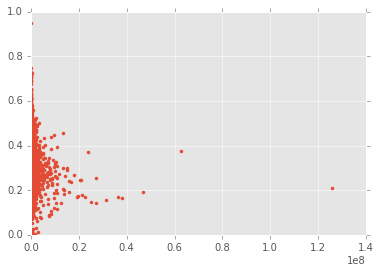

In [81]:
plt.plot(data.TSize,data.trump/data.TElectorate,'.')

In [82]:
ind=(data.Population<1e4)&(data.Population>1e3)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.6807789237537512

In [83]:
ind=(data.Population<1e3)&(data.Population>1e1)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.7988649066987703

In [84]:
ind=(data.Population<1e5)&(data.Population>1e4)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.6234965717197312

In [85]:
ind=(data.Population<1e7)&(data.Population>1e5)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.5492493444489315

In [86]:
ind=(data.Density<1e2)&(data.Population>1e1)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.6141529737655815

In [87]:
ind=(data.Density<1e3)&(data.Population>1e2)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.5833182847324875

In [88]:
ind=(data.Density<1e4)&(data.Density>1e3)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.5391731233985939

In [89]:
ind=(data.Density<1e2)&(data.Density>1e1)
1.0*(0*sum(data.trump[ind])+1*sum(data.clinton[ind]))/sum(data.TElectorate[ind])

0.19143366636014095

In [90]:
ind=(data.Density<1e3)&(data.Density>1e2)
1.0*(0*sum(data.trump[ind])+1*sum(data.clinton[ind]))/sum(data.TElectorate[ind])

0.21322817740492547

In [91]:
ind=(data.Density<1e4)&(data.Density>1e3)
1.0*(0*sum(data.trump[ind])+1*sum(data.clinton[ind]))/sum(data.TElectorate[ind])

0.21518141193793403

In [92]:
ind=(data.Density<1e3)&(data.Density>1e2)
1.0*(sum(data.TLatino[ind]))/sum(data.TElectorate[ind])

0.16025357987793523

In [93]:
ind=(data.Density<1e2)&(data.Density>1e1)
1.0*sum(data.TLatino[ind])/sum(data.TElectorate[ind])

0.11485779576686408

In [94]:
ind=(data.Density<1e4)&(data.Population>1e3)
1.0*sum(data.TLatino[ind])/sum(data.TElectorate[ind])

0.17836676856992692

In [95]:
addFactorAnalysis('TElectorate','TDensity');

R2 = 0.1351, p-value=3.097192e-85, estimate=[-8.793852e-05 -7.244508e-05]


In [96]:
ind=(data.Density<1e2)&(data.Population>1e1)
1.0*sum(data.TDensity[ind])/sum(data.TElectorate[ind])

3.6732543252525525

In [97]:
singleFactorAnalysis('TDensity')

[0.069083116054926896, 0.059871395032437102]

In [98]:
lm_ = smf.ols(formula='trumpp ~ SDensity', data = data).fit()
print lm_.summary()

                            OLS Regression Results                            
Dep. Variable:                 trumpp   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     72.22
Date:                Tue, 13 Dec 2016   Prob (F-statistic):           3.17e-17
Time:                        08:34:23   Log-Likelihood:                 643.26
No. Observations:                2640   AIC:                            -1283.
Df Residuals:                    2638   BIC:                            -1271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6611      0.004    148.564      0.0

In [99]:
lm_ = smf.ols(formula='trump ~ TDensity', data = data).fit()
print lm_.summary()

                            OLS Regression Results                            
Dep. Variable:                  trump   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 2.692e+04
Date:                Tue, 13 Dec 2016   Prob (F-statistic):               0.00
Time:                        08:34:23   Log-Likelihood:                -29685.
No. Observations:                2640   AIC:                         5.937e+04
Df Residuals:                    2638   BIC:                         5.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   6504.6446    370.460     17.558      0.0

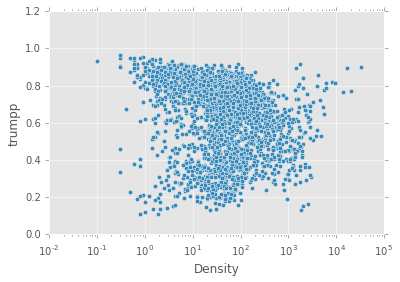

In [100]:
data.plot(x='TDensity', y = 'trumpp', kind='scatter', logx=True)

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
data.columns

Index([                u'trump',               u'clinton',
                   u'processed',             u'area_name',
          u'state_abbreviation',            u'Population',
                   u'PST040210',             u'PST120214',
                   u'POP010210',             u'AGE135214',
                u'Population18',                u'Senior',
                      u'Female',                 u'White',
                       u'Black',             u'RHI325214',
                       u'Asian',             u'RHI525214',
                       u'Mixed',                u'Latino',
                     u'WhiteNH',             u'POP715213',
                     u'Foreign',             u'POP815213',
                   u'EDU635213',              u'Bachelor',
                   u'VET605213',             u'LFE305213',
                   u'HSG010214',            u'HomeOwners',
                   u'HSG096213',             u'HSG495213',
                   u'HSD410213',             u'HSD310213

In [103]:
data_new = data[['SIncome_norm', 'SBachelor_norm',\
                 'SRacialDiversity_norm', 'SForeign_norm', 'SDensity_norm']]

In [104]:
data_new.head()

,SIncome_norm,SBachelor_norm,SRacialDiversity_norm,SForeign_norm,SDensity_norm
fips,,,,,
1001,1.042057,0.949301,0.882566,0.220220,0.948865
1003,2.115500,2.344761,1.191916,0.960459,1.929538
1005,0.484452,0.413129,1.381169,0.285419,0.515525
1007,0.458397,0.340874,0.604191,0.108192,0.495844
1009,0.887965,0.555100,0.455237,0.610556,0.971916


In [105]:
data_new.shape

(2640, 5)

In [106]:
data_new = data_new.dropna()

In [107]:
clf = RandomForestClassifier(n_estimators=100)

In [108]:
model = clf.fit(data_new, data.trumpp)

In [109]:
model.feature_importances_

array([ 0.19864577,  0.20017764,  0.20078254,  0.20196822,  0.19842583])

In [110]:
data_new = data[['SFemale', 'SBachelor','SLatino','SBlack', 'SAsian',\
                 'SIncome', 'SForeign', 'SDensity']]

In [111]:
data_new = data_new.dropna()

In [112]:
data_new.head()

,SFemale,SBachelor,SLatino,SBlack,SAsian,SIncome,SForeign,SDensity
fips,,,,,,,,
1001,104.628308,56.876226,5.496040,38.065163,2.239127,66866.303674,3.256912,919.998807
1003,202.020406,140.483543,18.150271,37.878826,3.551140,135746.661102,14.204560,1870.838306
1005,67.829747,24.752146,6.550083,69.285321,0.727787,31086.109701,4.221165,499.842241
1007,61.203377,20.423068,2.800155,29.468293,0.266681,29414.281394,1.600088,480.759576
1009,106.046773,33.258150,18.269444,3.779885,0.629981,56978.632505,9.029725,942.348872


In [113]:
clf = RandomForestClassifier(n_estimators=100)
model = clf.fit(data_new, data.Strump)
model.feature_importances_

array([ 0.12456854,  0.12603404,  0.12523939,  0.12579284,  0.12583977,
        0.1230363 ,  0.12473924,  0.12474987])

In [115]:
data_new = data[['TFemale', 'TSeniors', 'TBlack', 'TLatino', 'TAsian',\
                 'TIncome', 'TBachelor', 'TArea', 'TRacialDiversity', 'TForeign']]
data_new = data_new.dropna()
clf = RandomForestClassifier(n_estimators=100)
model = clf.fit(data_new, data.trump)
model.feature_importances_

array([ 0.09500305,  0.10062393,  0.10354733,  0.1011244 ,  0.10165702,
        0.09694699,  0.09879995,  0.10477825,  0.09739102,  0.10012807])

In [118]:
array_a = list(np.arange(len(data_new.columns)))

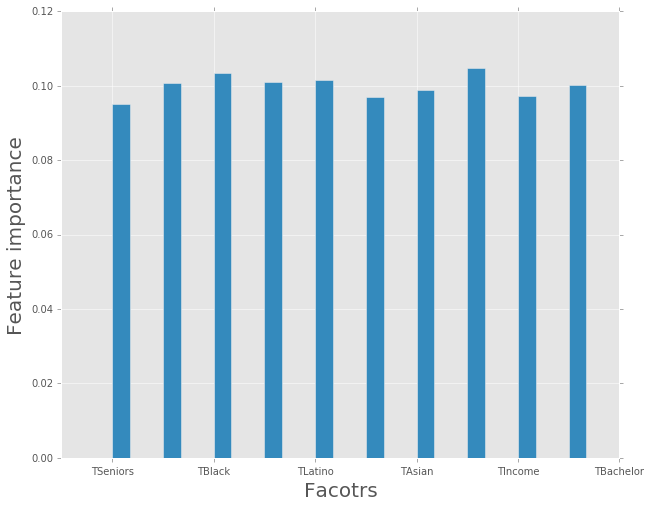

In [119]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.bar(array_a, model.feature_importances_, 0.35)
ax.set_ylabel('Feature importance', fontsize=20)
ax.set_xlabel('Facotrs', fontsize=20)
ax.set_xlim(-1,10)
ax.set_xticklabels(['TFemale', 'TSeniors', 'TBlack', 'TLatino', 'TAsian',\
                 'TIncome', 'TBachelor', 'TArea', 'TRacialDiversity', 'TForeign'])

[ 0.09628969  0.1057748   0.10281487  0.09610705  0.09962712  0.0809617
  0.10978782  0.10564554  0.10672872  0.09626269]


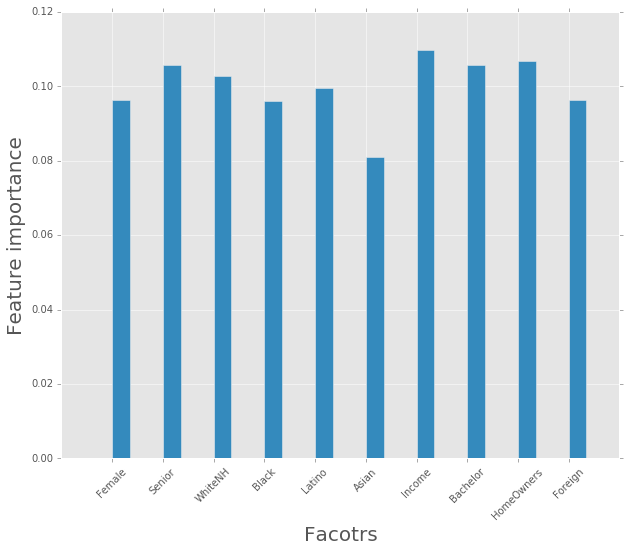

In [120]:
col = ['Female', 'Senior', 'WhiteNH', 'Black', 'Latino', 'Asian', 'Income', 'Bachelor', 'HomeOwners', 'Foreign']
data_new = data[col]
data_new = data_new.dropna()
clf = RandomForestClassifier(n_estimators=100)
model = clf.fit(data_new, data.trump)
print model.feature_importances_
array_a = np.arange(len(data_new.columns.values))
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.bar(array_a, model.feature_importances_, 0.35)
ax.set_ylabel('Feature importance', fontsize=20)
ax.set_xlabel('Facotrs', fontsize=20)
ax.set_xlim(-1,10)
ax.set_xticks(array_a)
ax.set_xticklabels(col, rotation=45)